# Mutual Information Analysis of Protein Sequences with Biobear, Polars
Autor: Jakub Vlk
- the goal was to use as much as possible polars for the data manipulation
- the mutual information is calculated using sklearn
- the visualization is done using pymol
- the file contains creating the MI.

In [2]:
from biobear import (
    connect
)
import polars as pl

session = connect()

fasta_path = "sequence.fasta"

df = session.read_fasta_file(str(fasta_path)).to_polars()

df_seq = df["sequence"]

df

id,description,sequence
str,str,str
"""1afr_C""","""mol:protein length:345 DELTA9…","""MPPREVHVQVTHSMPPQKIEIFKSLDNWAE…"
"""tr|B9T0X0|B9T0X0_RICCO""","""Acyl-[acyl-carrier-protein] de…","""MALKLNPFLSQTQKLPSFALPPMASTRSPK…"
"""tr|A0A067LJ27|A0A067LJ27_JATCU""","""Acyl-[acyl-carrier-protein] de…","""MALKLNSFISQSHKLPTFALPPMANLRSPK…"
"""tr|K0E5T2|K0E5T2_MANES""","""Acyl-[acyl-carrier-protein] de…","""MALKLNPSISQSHKMPSFSLPPMASLRSPK…"
"""tr|A0A8B8PP19|A0A8B8PP19_9MYRT""","""Acyl-[acyl-carrier-protein] de…","""MALKLNPFLASESMMKSPSFALPPMANRSL…"
…,…,…
"""tr|A0A6J1AV35|A0A6J1AV35_9ROSI""","""Acyl-[acyl-carrier-protein] de…","""MALKLNPITSQSQKLPSFALPPMASLRSPK…"
"""tr|A0A7N2MTZ2|A0A7N2MTZ2_QUELO""","""Acyl-[acyl-carrier-protein] de…","""MALKLSLFTSQPPKLPSFALQQKSTLRSPK…"
"""tr|A0A061EJX5|A0A061EJX5_THECC""","""Acyl-[acyl-carrier-protein] de…","""MHLISTKWALYLLSLSFAKCVFSLLWSKVK…"


In [3]:
# Expand the sequences into individual character columns
max_len = df.select(pl.col("sequence").str.len_chars().max()).item()

df_expanded = df.with_columns(
    [
        pl.col("sequence").str.slice(i, 1).alias(f"char_{i + 1}")
        for i in range(max_len)
    ]
)
df_expanded

id,description,sequence,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,…,char_421,char_422,char_423,char_424,char_425,char_426,char_427,char_428,char_429,char_430,char_431,char_432,char_433,char_434,char_435,char_436,char_437,char_438,char_439,char_440,char_441,char_442,char_443,char_444,char_445,char_446,char_447,char_448,char_449,char_450,char_451,char_452,char_453,char_454,char_455,char_456,char_457
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""1afr_C""","""mol:protein length:345 DELTA9…","""MPPREVHVQVTHSMPPQKIEIFKSLDNWAE…","""M""","""P""","""P""","""R""","""E""","""V""","""H""","""V""","""Q""","""V""","""T""","""H""","""S""","""M""","""P""","""P""","""Q""","""K""","""I""","""E""","""I""","""F""","""K""","""S""","""L""","""D""","""N""","""W""","""A""","""E""","""E""","""N""","""I""","""L""",…,"""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",""""""
"""tr|B9T0X0|B9T0X0_RICCO""","""Acyl-[acyl-carrier-protein] de…","""MALKLNPFLSQTQKLPSFALPPMASTRSPK…","""M""","""A""","""L""","""K""","""L""","""N""","""P""","""F""","""L""","""S""","""Q""","""T""","""Q""","""K""","""L""","""P""","""S""","""F""","""A""","""L""","""P""","""P""","""M""","""A""","""S""","""T""","""R""","""S""","""P""","""K""","""F""","""Y""","""M""","""A""",…,"""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",""""""
"""tr|A0A067LJ27|A0A067LJ27_JATCU""","""Acyl-[acyl-carrier-protein] de…","""MALKLNSFISQSHKLPTFALPPMANLRSPK…","""M""","""A""","""L""","""K""","""L""","""N""","""S""","""F""","""I""","""S""","""Q""","""S""","""H""","""K""","""L""","""P""","""T""","""F""","""A""","""L""","""P""","""P""","""M""","""A""","""N""","""L""","""R""","""S""","""P""","""K""","""F""","""Y""","""M""","""A""",…,"""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",""""""
"""tr|K0E5T2|K0E5T2_MANES""","""Acyl-[acyl-carrier-protein] de…","""MALKLNPSISQSHKMPSFSLPPMASLRSPK…","""M""","""A""","""L""","""K""","""L""","""N""","""P""","""S""","""I""","""S""","""Q""","""S""","""H""","""K""","""M""","""P""","""S""","""F""","""S""","""L""","""P""","""P""","""M""","""A""","""S""","""L""","""R""","""S""","""P""","""K""","""F""","""Y""","""M""","""A""",…,"""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",""""""
"""tr|A0A8B8PP19|A0A8B8PP19_9MYRT""","""Acyl-[acyl-carrier-protein] de…","""MALKLNPFLASESMMKSPSFALPPMANRSL…","""M""","""A""","""L""","""K""","""L""","""N""","""P""","""F""","""L""","""A""","""S""","""E""","""S""","""M""","""M""","""K""","""S""","""P""","""S""","""F""","""A""","""L""","""P""","""P""","""M""","""A""","""N""","""R""","""S""","""L""","""R""","""S""","""P""","""T""",…,"""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",""

In [4]:
# Identify index columns and sequence columns
index_cols = df_expanded.columns[:3]
sequence_cols = df_expanded.columns[3:]

# Transformation to long format, transposing the sequence columns
df_long = df_expanded.unpivot(
    index=index_cols,
    on=sequence_cols,
    variable_name="position_column",
    value_name="amino_acid"
)

# Calculate scores by the grouping transposed table, sql-like approach
scores_df = (
    df_long
    .filter(
        (pl.col("amino_acid").is_not_null()) & (pl.col("amino_acid") != "") & (pl.col("amino_acid") != "-")
    )
    .group_by("position_column", maintain_order=True)
    .map_groups(
        lambda group: pl.DataFrame(
            {
                "position_column": group["position_column"][0],
                "score": (
                        group["amino_acid"].filter(
                            group["amino_acid"].is_in(group["amino_acid"].mode())
                        ).len()
                        / group.height
                ),
            }
        )
    )
)

lower_conservations = scores_df.filter(
    pl.col("score") < 0.60)  # the convesation have to be at max 0.6 (chosen for limiting number of the pairs)

lower_conservations


position_column,score
str,f64
"""char_7""",0.538462
"""char_8""",0.538462
"""char_12""",0.461538
"""char_13""",0.384615
"""char_22""",0.384615
…,…
"""char_397""",0.4
"""char_398""",0.4
"""char_399""",0.5


In [21]:
import polars as pl
import numpy as np
import itertools
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score # Import the normalized MI function, the first was used before, just for clearity

# conversion dictionary for amino acids to integers,for some reason sklearn does not accept strings (mby im just dumb)
unique_aminos = np.unique(df_expanded.to_numpy().flatten())
unique_aminos = [amino for amino in unique_aminos if amino != '-' and amino is not None]


amino_to_int = {amino: i for i, amino in enumerate(unique_aminos)}


cols = lower_conservations.filter(pl.col("score") < .65).select(pl.col("position_column")).to_series().to_list()
mi_results = []

# Iterate through all unique pairs of columns
for col1, col2 in itertools.combinations(cols, 2):


    df_pair = df_expanded.filter((pl.col(col1) != '-') & (pl.col(col2) != '-')) # filter out gaps in either column

    vec1_numeric = df_pair.get_column(col1).replace(amino_to_int).to_numpy()
    vec2_numeric = df_pair.get_column(col2).replace(amino_to_int).to_numpy()

    mi_nats = normalized_mutual_info_score(vec1_numeric, vec2_numeric)

    pos1 = int(col1.split('_')[-1])
    pos2 = int(col2.split('_')[-1])

    mi_results.append({"pos1": pos1, "pos2": pos2, "MI": mi_nats})

mi_pairs_df = pl.DataFrame(mi_results)
mi_pairs_df = mi_pairs_df.sort("MI", descending=True)

mi_pairs_df

Pozice 1,Pozice 2,MI
i64,i64,f64
40,130,1.0
40,190,1.0
110,313,1.0
126,132,1.0
126,364,1.0
…,…,…
7,397,0.402101
7,398,0.402101
7,399,0.383998


# Visualization of the Mutual Information Results in PyMOL
- visulization of the results using pymol
- if the residue is in multiple pairs, the backbone is colored purple and the sidechain is colored based on the MI value
- the MI value is also labeled on the C-alpha atom
- the distance between the C-alpha atoms of the pairs is also labeled with the distance in angstroms

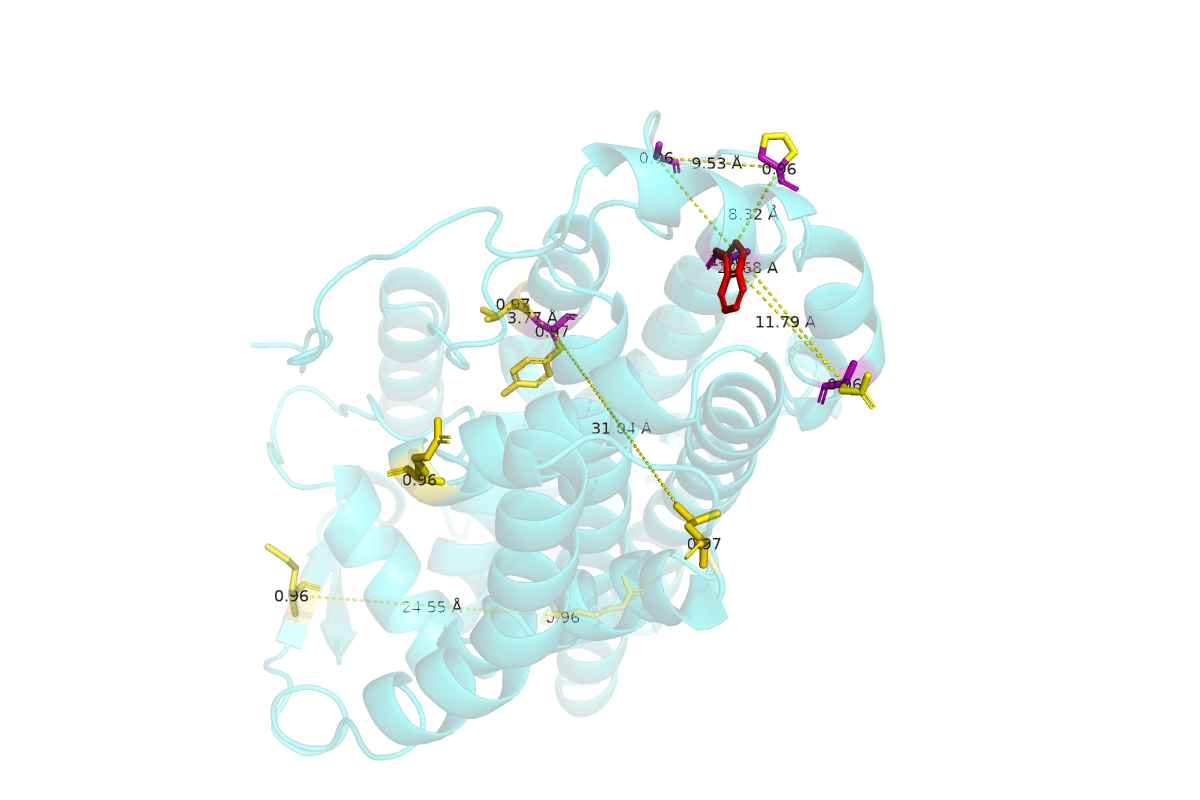

In [38]:
PDB_ID = "1afr_C"  # Use the 4-character PDB ID
SPECIAL_COLOR = "purple"  # Color for the backbone of residues in multiple pairs

import pymol
from pymol import cmd
from IPython.display import Image

# Launch PyMOL in the background for Jupyter, not really sure why you cant interact with it inside jupyter (opens a new window)
pymol.finish_launching(['pymol', '-q'])
cmd.reinitialize()

# --- 3. DATA LOADING AND CHAIN FILTERING ---
print(f"Fetching structure for PDB ID: {PDB_ID}...")
cmd.fetch(PDB_ID, "protein_full")

mi_pairs_df.columns = ['pos1', 'pos2', 'mi']

# Also filter out MI=1, as it often represents a self-correlation artifact
top_10_pairs = mi_pairs_df.filter(pl.col("mi") != 1).head(10)
print(f"\nProcessing the following {top_10_pairs.height} pairs:")
print(top_10_pairs)

# store all MI values for each residue to detect those in multiple pairs
residue_info = {}
# Get min/max MI from ONLY the top 10 pairs for a better color scale
min_mi, max_mi = top_10_pairs['mi'].min(), top_10_pairs['mi'].max()

# Iterate through ONLY the top 10 pairs
for pos1, pos2, mi in top_10_pairs.iter_rows():
    # For pos1, append the MI value
    if pos1 not in residue_info:
        residue_info[pos1] = []
    residue_info[pos1].append(mi)

    # For pos2, append the MI value
    if pos2 not in residue_info:
        residue_info[pos2] = []
    residue_info[pos2].append(mi)

cmd.bg_color("white")
cmd.hide("everything", "all")
cmd.show("cartoon", "protein")
# cmd.color("gray80", "protein") # Light gray for the whole protein doesnt look good.


for index, (pos1, pos2, mi) in enumerate(top_10_pairs.iter_rows(named=False)):
    sel1_ca = f"protein and resi {pos1} and name CA"
    sel2_ca = f"protein and resi {pos2} and name CA"

    if cmd.count_atoms(sel1_ca) > 0 and cmd.count_atoms(sel2_ca) > 0:
        distance_value = cmd.distance(f"dist_{index}", sel1_ca, sel2_ca)

        cmd.hide("labels", f"dist_{index}")

        midpoint_name = f"midpoint_{index}"
        cmd.pseudoatom(midpoint_name, selection=f"({sel1_ca}) or ({sel2_ca})")

        angstrom_symbol = "\u00C5"  # Unicode for Angstrom symbol (Å)
        label_text = f'"{distance_value:.2f} {angstrom_symbol}"'

        cmd.label(midpoint_name, label_text)

        # Step 6: Hide the pseudoatom itself, so only our new label is visible.
        cmd.hide("nonbonded", midpoint_name)

        # cmd.set("dash_gap", 0.0, f"dist_{index}")      # Make the line solid
        # cmd.set("dist_color", "blue", f"dist_{index}") # Set line color

        # Print the results to the console as before
        print(f"Pair {pos1}-{pos2}: MI = {mi:.3f}, C-alpha Distance = {distance_value:.2f} Å")

found_residues = []
for resi, mi_values in residue_info.items():
    selection = f"protein and resi {resi}"
    if cmd.count_atoms(selection) > 0:
        found_residues.append(str(resi))

        # The color is always based on the HIGHEST MI value for that residue
        max_mi_for_resi = max(mi_values)

        # Normalize the MI value to a 0.0-1.0 scale for the color gradient
        if max_mi == min_mi:
            norm_mi = 1.0
        else:
            norm_mi = (max_mi_for_resi - min_mi) / (max_mi - min_mi)

        # Create a unique color name for this residue based on its MI
        primary_color_name = f"color_mi_{resi}"
        cmd.set_color(primary_color_name, [1, 1 - norm_mi, 0])  # Yellow-to-Red gradient

        # Show the residue as sticks
        cmd.show("sticks", selection)

        if len(mi_values) > 1:
            # If the residue is in multiple pairs, use "split" coloring
            print(f"Residue {resi} is in {len(mi_values)} pairs. Applying special color.")
            cmd.color(SPECIAL_COLOR, f"{selection} and backbone")  # Color backbone with the special color
            cmd.color(primary_color_name, f"{selection} and sidechain")  # Color sidechain with the MI-based color
        else:
            # Otherwise, color the whole residue with the MI-based color
            cmd.color(primary_color_name, selection)

        # --- ADD MI VALUE LABEL ---
        # The label text must be inside quotes for the PyMOL command
        label_text = f'"{max_mi_for_resi:.2f}"'
        cmd.label(f"{selection} and name CA", label_text)

# --- 6. FINAL VIEW ADJUSTMENTS ---
if found_residues:
    cmd.zoom("resi " + "+".join(found_residues))
else:
    cmd.zoom("protein")

cmd.set("cartoon_transparency", 0.7)
cmd.set("label_size", -0.8)  # Adjust label size for better readability
cmd.set("label_color", "black")

img_width, img_height = 1200, 800
cmd.set("ray_opaque_background", 0)  # 0 = transparent, 1 = opaque
cmd.ray(img_width, img_height)

IMAGE_FILENAME = "mi_analysis.png"

cmd.png(IMAGE_FILENAME, dpi=300)
Image(filename=IMAGE_FILENAME)
